In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.datasets import cifar10
from resnet34 import ResNet34

## load cifar10 data

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
num_classes = 10
input_shape = X_train[0].shape
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)


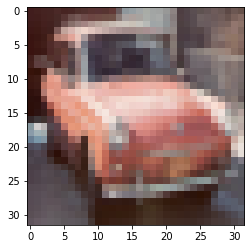

1


In [3]:
num = 64
plt.imshow(X_train[num])
plt.show()
print(np.argmax(Y_train[num]))

In [5]:
model = ResNet34(latent=1024, n_classes=num_classes, activation='softmax')
model.build(input_shape=(1, 32, 32, 3))
model.summary()

Model: "res_net34_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          multiple                  9472      
                                                                 
 batch_normalization_36 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  multiple                  0         
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 residual_block_16 (Residual  multiple                 74368     
 Block)                                                          
                                                       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

In [ ]:
model.evaluate(X_test, Y_test, verbose=1)